In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import classification_report, accuracy_score,f1_score,roc_auc_score,roc_curve

In [ ]:

df=pd.read_json (r'/content/sample_data/logins.json',convert_dates=True)

In [ ]:
df.index=df['login_time']

In [ ]:
df.dtypes

login_time    datetime64[ns]
dtype: object

In [ ]:
df.isnull().sum()

login_time    0
dtype: int64

In [ ]:
df['Year']=pd.DatetimeIndex(df['login_time']).year

In [ ]:
df['Month']=pd.DatetimeIndex(df['login_time']).month

In [ ]:
df['Minute']=pd.DatetimeIndex(df['login_time']).minute

In [ ]:
df.head()

,login_time,Year,Month,Minute
login_time,,,,
1970-01-01 20:13:18,1970-01-01 20:13:18,1970,1,13
1970-01-01 20:16:10,1970-01-01 20:16:10,1970,1,16
1970-01-01 20:16:37,1970-01-01 20:16:37,1970,1,16
1970-01-01 20:16:36,1970-01-01 20:16:36,1970,1,16
1970-01-01 20:26:21,1970-01-01 20:26:21,1970,1,26


In [ ]:
df.Year.unique()

array([1970])

In [ ]:
df.Month.unique()

array([1, 2, 3, 4])

In [ ]:
df['count']=1

In [ ]:
df_agg=df.resample('15T', on='login_time')['count'].sum().reset_index()

In [ ]:
df_agg.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


(array([719163., 719177., 719194., 719208., 719222., 719236., 719253.,
        719267.]), <a list of 8 Text major ticklabel objects>)

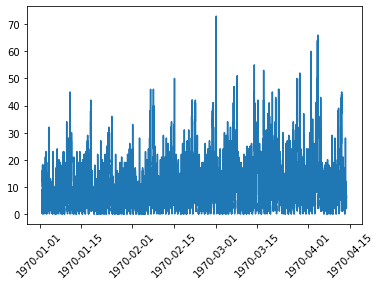

In [ ]:
plt.plot(df_agg['login_time'],df_agg['count'])
plt.xticks(rotation=45)

In [ ]:
y=df_agg['count']

(array([719163., 719177., 719194., 719208., 719222., 719236., 719253.,
        719267.]), <a list of 8 Text major ticklabel objects>)

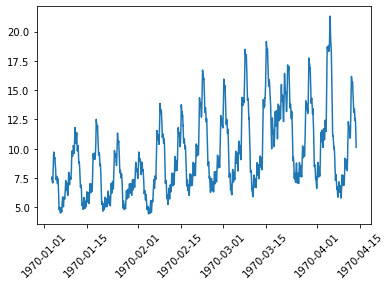

In [ ]:
#plotting the weekly average (24*7)
y_smooth=y.rolling(168).mean()
plt.plot(df_agg['login_time'],y_smooth)
plt.xticks(rotation=45)

In [ ]:
# Count by weekday, 0 = Monday, 6 = Sunday
df_agg['weekday'] = df_agg['login_time'].dt.dayofweek
df_weekday = df_agg.sort_values(by='count', ascending=False)
weekday_counts = df_weekday[['count', 'weekday']]
weekday_counts = weekday_counts.groupby('weekday').sum().reset_index()
weekday_counts

,weekday,count
0,0,8823
1,1,9268
2,2,10339
3,3,11960
4,4,15208
5,5,19377
6,6,18167


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

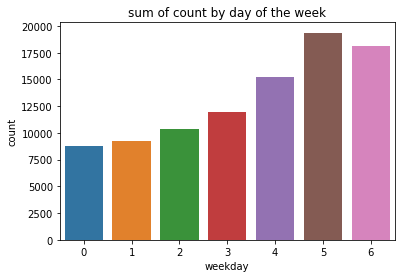

In [ ]:
sns.barplot(x='weekday',y='count',data=weekday_counts)
plt.title('sum of count by day of the week')
plt.show()

Discussion: Saturday seems to be the most popular time for user logins. the weekly rolling average indicates spikes and dips in monthly activity with a increase in activity end of march and april.

# Ultimate Gotham and Metropolis cities challenge:
Q1: . What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

Answer1:
check for mean number of tolls/cars of partner drivers passed going into Gotham and mean number of tolls used/cars of partner drivers passed going in to Metropolis in the daytime and then again in the night time





Q2: Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment

Answer a: Assumptions: data of toll use is availible for partner drivers, population variance is unknown and sample size is small.

Collect this data and check for number of drivers going into gotham during the day Gotham_day, and the night, Gotham_night. In the same manner check for  number of drivers going into Metropolis during the day, Metro_day and going into the Metropolis at night, Metro_night

Check for numbers of all these four groups pre-change(Gotham_day, Gotham_night, Metro_day, Metro_night) before the proposed change

Check for mean numbers of all these four groups post-change(Gotham_day, Gotham_night, Metro_day, Metro_night) after the proposed change




b. what statistical test(s) you will conduct to verify the significance of the
observation

Test 1 Check for statsistical difference of means using a t-test for each group checking between pre and post intervention
Test 2 Check for statistical difference of means using an t-test between pre-change Gotham_day and Metro_day and post change
Test 3 Check for statistical difference of means using an t-test between pre-change Gotham_night and Metro_night and post change


c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

Test 1: for a positive result after implementing the process change, the Gotham_day group should have an increase in number in the post-change versus a pre-change, and check for statistical difference of means(*). The Metro_day group should have a drop in number in the post change and *, the Gotham_night group should have a drop in number and *, and the Metro_night group should have an increase in number and *. If the changes are not as expected, this will be relayed to the authorities and recommnedations made to improve the process

Test 2 and Test 3: there shoudld be a difference in means pre-change between Metro_night and Gotham_night groups, also between Metro_day and Gotham_day groups.
Post change, if the process change was succcessful, there should be little to no difference in means in the two group sets. If the numbers are not as expected, the rationale behind the results will be explained goals will be set to improve the process.




#Part 3 ‑ Predictive modeling

Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account inJanuary 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).
Data description
● city: city this user signed up in
● phone: primary device for this user
● signup_date: date of account registration; in the form ‘YYYYMMDD’
● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
● avg_rating_by_driver: the rider’s average rating over all of their trips
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
● surge_pct: the percent of trips taken with surge multiplier > 1
● avg_surge: The average surge multiplier over all of this user’s trips
● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
● weekday_pct: the percent of the user’s trips occurring during a weekda

In [5]:
df=pd.read_json(r'/content/sample_data/ultimate_data_challenge.json',convert_dates=True)

In [6]:
from datetime import datetime,timedelta

	


In [7]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [5]:
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [7]:
df.shape

(50000, 12)

In [8]:
df['signup_date']=pd.to_datetime(df['signup_date'])

In [9]:
df['last_trip_date']=pd.to_datetime(df['last_trip_date'])

#What fraction of the observed users were retained?

In [10]:
# determine which user is active: if they were “active” (i.e. took a trip) in the preceding 30 days.
# find the most recent date the data was collected
last_data_date=df['last_trip_date'].max()

In [11]:
print(last_data_date)

2014-07-01 00:00:00


In [12]:
# find active users who had a trip in the last 30 days from the last_data_date
last_thirty = last_data_date - timedelta(days=30)
df['active_user'] =(df.last_trip_date>last_thirty).astype('int')



In [38]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [13]:
df['count']=1


In [14]:
user_fraction=df.groupby('active_user')['count'].sum().reset_index()

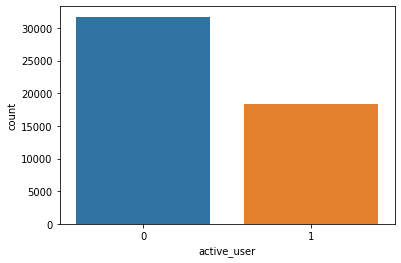

In [15]:
# fraction of observed users retained
sns.barplot(x='active_user', y='count',data=user_fraction)

In [16]:
total_users=len(df)

In [17]:
user_fraction

,active_user,count
0,0,31690
1,1,18310


In [18]:
active_fraction=18310/50000
print('fraction of active users :{}'.format(active_fraction))
percentage_active=active_fraction*100
print('percentage of active users :{}%'.format(percentage_active))


fraction of active users :0.3662
percentage of active users :36.620000000000005%


In [65]:
# before modeling lets assess for any null values and impute as needed

In [19]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
active_user                  0
count                        0
dtype: int64

In [20]:
df['avg_rating_of_driver'].fillna(int(df['avg_rating_of_driver'].mean()),inplace=True)

In [21]:
df['avg_rating_by_driver'].fillna(int(df['avg_rating_by_driver'].mean()),inplace=True)

In [22]:
print(df.groupby('phone')['count'].sum().reset_index())

     phone  count
0  Android  15022
1   iPhone  34582


In [23]:
df['phone']=df['phone'].fillna('Android')

In [24]:
df.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
active_user               0
count                     0
dtype: int64

In [ ]:
# modeling to predict active users in the 6 month of the system
# this is a binary classification model 
# independent variables have mixed data type , categorical and integer
# target varaible class is imbalanced, we are interested in predicting the active user '1', which is the minority class,
# we will look at the f1 metric of the positive class as a metric of comparison


In [25]:
#find how many months, years have covered
df['Year']=pd.DatetimeIndex(df['last_trip_date']).year

In [26]:
df['Month']=pd.DatetimeIndex(df['last_trip_date']).month

In [27]:
df['Year'].unique()

array([2014])

In [28]:
df['Month'].unique()

array([6, 5, 1, 3, 2, 7, 4])

In [52]:
X=df.drop(['active_user', 'count', 'Year', 'Month','signup_date','last_trip_date'],axis=1)

In [33]:
X.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [53]:
y=df['active_user']

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
from sklearn.model_selection import train_test_split

In [54]:
# assign dummy varaibales to categorical data
X=pd.get_dummies(X,drop_first=True)

#split train test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)




In [55]:
# fit the random forest classifier 

model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)



In [56]:
#predict probabilities
yhat=model.predict_proba(X_test)

In [58]:
# Best threshold based on f1 score for positive class
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')
 
# keep probabilities for the positive outcome only
probs = yhat[:, 1]
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
# get best threshold
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))
# Best threshold for f1 score: THRESHOLD
THRESHOLD=thresholds[ix]
#Calculate predcitions on best threshold
preds = np.where(model.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), roc_auc_score(y_test, preds)], index=["accuracy", "roc_auc_score"])

Threshold=0.370, F-Score=0.68837


,0
accuracy,0.746100
roc_auc_score,0.746974


In [59]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.83      0.74      0.79      6274
           1       0.63      0.75      0.69      3726

    accuracy                           0.75     10000
   macro avg       0.73      0.75      0.74     10000
weighted avg       0.76      0.75      0.75     10000



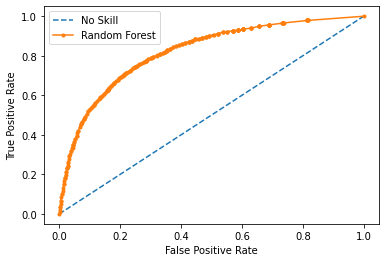

In [60]:
#plot the ROC
from matplotlib import pyplot
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Random Forest')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

11


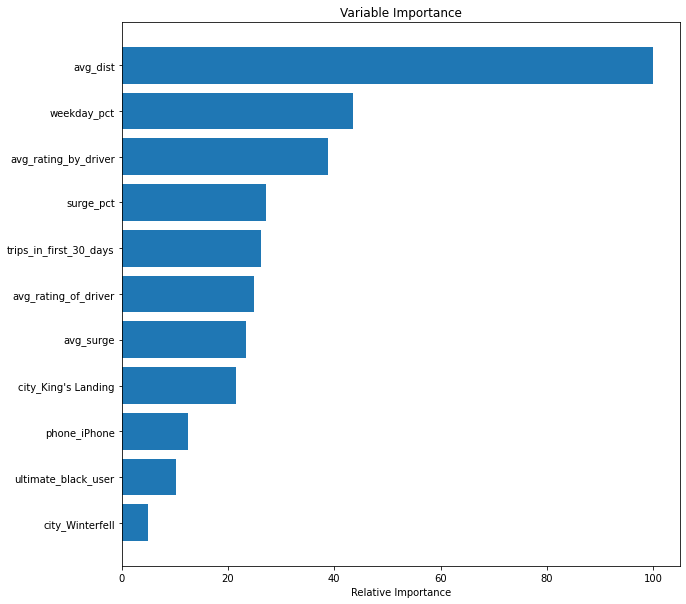

In [62]:
# Look at feature importance based on the random forest classifier
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.show()


Use the XG boost classifier

In [63]:
from xgboost import XGBClassifier

In [65]:
model=XGBClassifier()

In [66]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)



In [67]:
#predict probabilities
yhat=model.predict_proba(X_test)

In [68]:
# Best threshold based on f1 score for positive class
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')
 
# keep probabilities for the positive outcome only
probs = yhat[:, 1]
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
# get best threshold
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))
# Best threshold for f1 score: THRESHOLD
THRESHOLD=thresholds[ix]
#Calculate predcitions on best threshold
preds = np.where(model.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), roc_auc_score(y_test, preds)], index=["accuracy", "roc_auc_score"])

Threshold=0.363, F-Score=0.71927


,0
accuracy,0.777300
roc_auc_score,0.774945


In [69]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82      6274
           1       0.68      0.77      0.72      3726

    accuracy                           0.78     10000
   macro avg       0.76      0.77      0.77     10000
weighted avg       0.79      0.78      0.78     10000



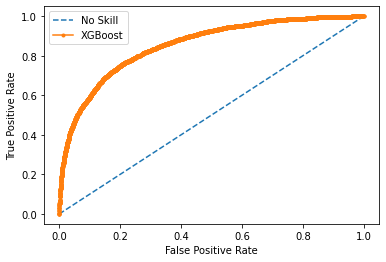

In [71]:
#plot the ROC
from matplotlib import pyplot
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='XGBoost')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

11


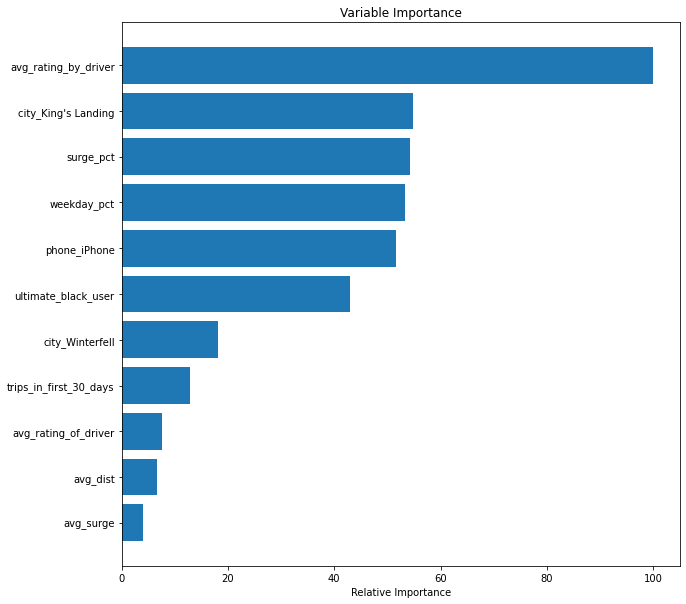

In [72]:
# Look at feature importance based on the random forest classifier
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.show()


Out of the two models, the XGBoost is the better model for predicting the active users, the f1 score of 0.72 was better as well as the accuracy score of 0.78 was better than the Random Forest Classifier model

city_King's landing is one of the features of importances, may be drivers that signup from this city are more likely to get retained, future marketing can be geared toward this location. average rating by driver is also a feature of importance, may be a survey would help undrestand why certain drivers gave higher ratings, and utilise the insights to improve retention.